In [3]:
import pandas as pd
# load deepdao deployments
deepdao_deployments_df = pd.read_csv('001_get_organizations/01_deepdao_daos/deepdao_deployments_by_platform_with_platform_ids.csv')
deepdao_deployments_df.head()

,deepdao_deployment_id,deepdao_organization_id,name,website,platform,platform_id_source,platform_id
0,242e652c-9f58-4953-ba59-18c49d51cdc2,000de27d-b92a-495f-89be-554d022bb498,ZooGang Dao,https://snapshot.org/#/zoogangdao.eth,snapshot,automatic,zoogangdao.eth
1,d3b7fce7-4715-4ad1-a316-412b1293eaef,004799ea-ef9e-432e-ae94-55a60f754f91,rugpullindex,https://snapshot.org/#/rugpullindex.eth,snapshot,automatic,rugpullindex.eth
2,a1e8e3cd-3bae-4239-8586-bd62d7c0fa0c,004d7017-ab61-40d3-aa6d-b546bb3dcd86,Komet Finance,https://snapshot.org/#/komet.eth,snapshot,automatic,komet.eth
3,e6cecf71-58ad-43ad-a5b6-d88228f123d6,0058e059-756c-4cf0-be93-2ea101e2cbff,Nftorbit,https://snapshot.org/#/nftorbit.eth,snapshot,automatic,nftorbit.eth
4,1815c9c4-690c-4092-a526-4d641bf24b4e,005ea4e2-624a-46f0-a7cd-1967d95d4092,JAMM,https://snapshot.org/#/jamm,snapshot,automatic,jamm


In [4]:
deepdao_deployments_df = deepdao_deployments_df[['platform_id', 'platform', 'deepdao_deployment_id']]
deepdao_deployments_df.head()

,platform_id,platform,deepdao_deployment_id
0,zoogangdao.eth,snapshot,242e652c-9f58-4953-ba59-18c49d51cdc2
1,rugpullindex.eth,snapshot,d3b7fce7-4715-4ad1-a316-412b1293eaef
2,komet.eth,snapshot,a1e8e3cd-3bae-4239-8586-bd62d7c0fa0c
3,nftorbit.eth,snapshot,e6cecf71-58ad-43ad-a5b6-d88228f123d6
4,jamm,snapshot,1815c9c4-690c-4092-a526-4d641bf24b4e


In [5]:
# get all deployments
all_deployments_df = pd.read_csv('001_get_deployments/all_deployments.csv')
all_deployments_df.head()

,platform,platform_id,name,additional,website,votes_count,proposals_count
0,snapshot,odidao.eth,ODI DAO,NaN,https://snapshot.org/#/odidao.eth,1.0,6.0
1,snapshot,olodao.eth,YING TG,https://www.partybid.app/buy/0xB74BE402fEfE6bb...,https://snapshot.org/#/olodao.eth,6.0,1.0
2,snapshot,onearth.eth,OnEarth DAO,"kevinonearth999, https://imagineonearth.xpandr...",https://snapshot.org/#/onearth.eth,6.0,3.0
3,snapshot,opyn11.eth,opyn11,NaN,https://snapshot.org/#/opyn11.eth,5.0,1.0
4,snapshot,partyplanningdao.eth,Party Planning DAO,NaN,https://snapshot.org/#/partyplanningdao.eth,1.0,1.0


In [6]:
all_deployments_df = all_deployments_df[['platform_id', 'platform', 'votes_count', 'proposals_count']]
all_deployments_df.head()

,platform_id,platform,votes_count,proposals_count
0,odidao.eth,snapshot,1.0,6.0
1,olodao.eth,snapshot,6.0,1.0
2,onearth.eth,snapshot,6.0,3.0
3,opyn11.eth,snapshot,5.0,1.0
4,partyplanningdao.eth,snapshot,1.0,1.0


In [7]:
# join on platform_id and platform
all_with_deepdao_df = pd.merge(all_deployments_df, deepdao_deployments_df, on=['platform_id', 'platform'], how='left')
# all_with_deepdao_df = pd.merge(all_deployments_df, deepdao_deployments_df, on=['platform_id', 'platform'], how='left', validate='one_to_one')
all_with_deepdao_df

,platform_id,platform,votes_count,proposals_count,deepdao_deployment_id
0,odidao.eth,snapshot,1.0,6.0,NaN
1,olodao.eth,snapshot,6.0,1.0,NaN
2,onearth.eth,snapshot,6.0,3.0,NaN
3,opyn11.eth,snapshot,5.0,1.0,NaN
4,partyplanningdao.eth,snapshot,1.0,1.0,NaN
...,...,...,...,...,...
22005,0xff07943f171b826b3618982a6213f157fbc5e226,daohaus,0.0,0.0,NaN
22006,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d,daohaus,123.0,122.0,61e1c8fb-1c67-43e8-bd4b-ae739a569fc2
22007,0xff4b20d48a1e8f93bf6745de388547e731f96fd0,daohaus,0.0,0.0,NaN
22008,0xffb676765d521518ac5c0d4f4067a9db9b72901b,daohaus,0.0,3.0,NaN


In [8]:
# count na deepdao_deployment_ids
all_with_deepdao_df['deepdao_deployment_id'].isna().sum()

20062

In [9]:
# make deepdao_deployment_id into bool
all_with_deepdao_df['deepdao_deployment_id'] = all_with_deepdao_df['deepdao_deployment_id'].notna()
# rename to 'on_deepdao'
all_with_deepdao_df = all_with_deepdao_df.rename(columns={'deepdao_deployment_id': 'on_deepdao'})
all_with_deepdao_df.head()

,platform_id,platform,votes_count,proposals_count,on_deepdao
0,odidao.eth,snapshot,1.0,6.0,False
1,olodao.eth,snapshot,6.0,1.0,False
2,onearth.eth,snapshot,6.0,3.0,False
3,opyn11.eth,snapshot,5.0,1.0,False
4,partyplanningdao.eth,snapshot,1.0,1.0,False


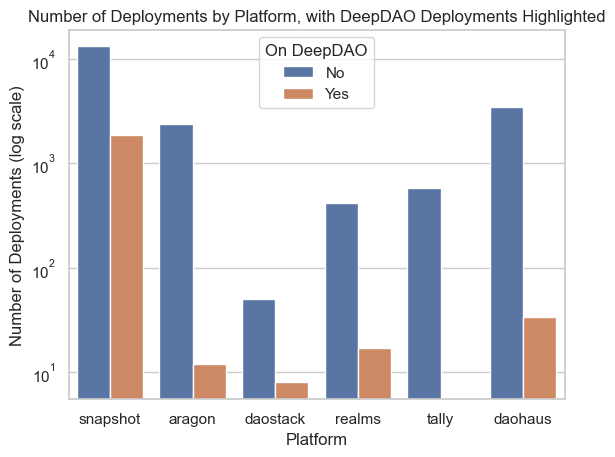

In [27]:
# shaded bar chart colored by on_deepdao w seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
# stacked
sns.countplot(x="platform", data=all_with_deepdao_df, hue='on_deepdao')
# make log
plt.yscale('log')

# update labels
plt.xlabel('Platform')
plt.ylabel('Number of Deployments (log scale)')
plt.title('Number of Deployments by Platform, with DeepDAO Deployments Highlighted')

# update legend
plt.legend(title='On DeepDAO', loc='upper center', labels=['No', 'Yes'])

In [28]:
# filter where vote_count is gt 50 and proposals_count is gt 10
filtered_all_with_deepdao_df = all_with_deepdao_df[(all_with_deepdao_df['votes_count'] > 50) & (all_with_deepdao_df['proposals_count'] > 10)]

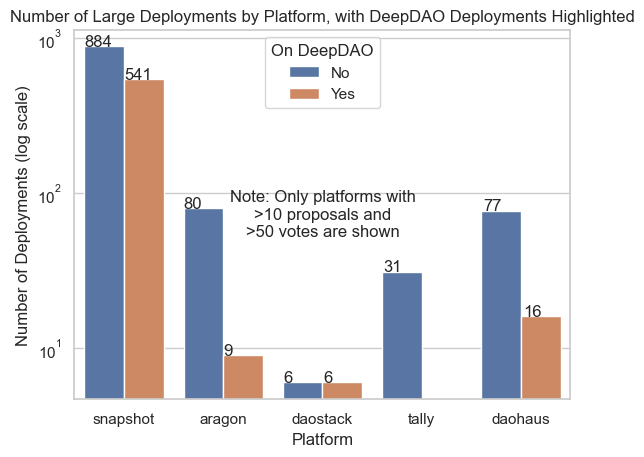

In [50]:
sns.set_theme(style="whitegrid")
# stacked
ax = sns.countplot(x="platform", data=filtered_all_with_deepdao_df, hue='on_deepdao')
# make log
plt.yscale('log')

# update labels
plt.xlabel('Platform')
plt.ylabel('Number of Deployments (log scale)')
plt.title('Number of Large Deployments by Platform, with DeepDAO Deployments Highlighted')
# subtitle
plt.text(0.5, 0.5, 'Note: Only platforms with\n>10 proposals and\n>50 votes are shown', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

# add numbers to the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

# update legend
plt.legend(title='On DeepDAO', loc='upper center', labels=['No', 'Yes'])